In [13]:
from torchvision import transforms, datasets
from torch.utils.data.dataset import random_split
import torch.utils.data
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),  # convert images to pytorch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]  # normalize the images
)

batch_size = 128

full_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

num_train = len(full_dataset)
num_val = int(0.2 * num_train)  # 20% for validation
train_dataset, val_dataset = random_split(full_dataset, [num_train - num_val, num_val])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  # CIFAR-10 classes

Files already downloaded and verified
Files already downloaded and verified


In [15]:
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


# # get some random training images
# dataiter = iter(train_loader)
# images, labels = next(dataiter)

# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Base CNN

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class BaseCNN(nn.Module):
    def __init__(self):
        super(BaseCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)
        
        self.fc1 = nn.Linear(in_features=32 * 5 * 5, out_features=120)  # 16*5*5 comes from the dimension reduction of the input image through conv and pooling layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer with 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = torch.flatten(x, 1)  # Flatten all dimensions except the batch dimension

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        
        return x
    
class threeLayerCNN(nn.Module):
    def __init__(self):
        super(threeLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(num_features=32)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(num_features=64)

        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(in_features=64 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        x = self.fc3(x)

        return x
    
class fourLayerCNN(nn.Module):
    def __init__(self):
        super(fourLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)

        self.fc1 = nn.Linear(in_features=128 * 2 * 2, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)

        return x
        
class fiveLayerCNN(nn.Module):
    def __init__(self):
        super(fiveLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, padding=2)

        self.fc1 = nn.Linear(in_features=256 * 1 * 1, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)

        return x
    
def train_model(model, criterion, optimizer, train_loader, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_predictions = labels.size(0)
        correct_predictions = (predicted == labels).sum().item()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    trian_accuracy = 100 * correct_predictions / total_predictions
    return avg_train_loss, trian_accuracy

def validate_model(model, criterion, val_loader, device):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss

def evaluate_model(model, test_loader, device, classes):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    # print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f} %')
    return accuracy

# {'BaseCNN': BaseCNN(), 'threeLayerCNN': threeLayerCNN()}
cnn = threeLayerCNN()  # change this to different models to test them

learning_rate = 0.001  # 0.005 0.003 0.001 0.0008 0.0005 0.0003 0.0001

criterion = nn.CrossEntropyLoss()
SGD_optimizer = optim.SGD(cnn.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)
Adam_optimizer = optim.Adam(cnn.parameters(), lr=learning_rate, weight_decay=5e-4)
Rms_prop_optimizer = optim.RMSprop(cnn.parameters(), lr=learning_rate, alpha=0.9, eps=1e-08, weight_decay=5e-4, momentum=0.9, centered=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn.to(device)

best_val_loss = float('inf')
epochs_no_improve = 0
n_epochs_stops = 5
early_stop = False

for epoch in range(100):
    train_loss, train_accuracy = train_model(cnn, criterion, Adam_optimizer, train_loader, device)
    val_loss = validate_model(cnn, criterion, val_loader, device)
    tesing_accuracy = evaluate_model(cnn, test_loader, device, classes)

    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.3f}, Train Accuracy: {train_accuracy:.2f}% Validation Loss: {val_loss:.3f}, Testing Accuracy: {tesing_accuracy:.2f}%')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(cnn.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve == n_epochs_stops:
            print(f'Early stopping at epoch {epoch+1}')
            early_stop = True
            break

if not early_stop:
    print('Finished Training')

evaluate_model(cnn, test_loader, device, classes)

if early_stop:
    cnn.load_state_dict(torch.load('best_model.pth'))

PATH = './cifar_net.pth'
torch.save(cnn.state_dict(), PATH)

Epoch 1, Training Loss: 2.015, Train Accuracy: 32.81% Validation Loss: 1.739, Testing Accuracy: 35.46%
Epoch 2, Training Loss: 1.651, Train Accuracy: 43.75% Validation Loss: 1.474, Testing Accuracy: 45.89%
Epoch 3, Training Loss: 1.470, Train Accuracy: 54.69% Validation Loss: 1.320, Testing Accuracy: 51.84%
Epoch 4, Training Loss: 1.357, Train Accuracy: 51.56% Validation Loss: 1.240, Testing Accuracy: 54.89%
Epoch 5, Training Loss: 1.259, Train Accuracy: 57.81% Validation Loss: 1.150, Testing Accuracy: 59.56%
Epoch 6, Training Loss: 1.183, Train Accuracy: 59.38% Validation Loss: 1.089, Testing Accuracy: 61.20%
Epoch 7, Training Loss: 1.124, Train Accuracy: 68.75% Validation Loss: 1.051, Testing Accuracy: 63.20%
Epoch 8, Training Loss: 1.068, Train Accuracy: 62.50% Validation Loss: 1.033, Testing Accuracy: 64.62%
Epoch 9, Training Loss: 1.012, Train Accuracy: 71.88% Validation Loss: 1.041, Testing Accuracy: 64.19%
Epoch 10, Training Loss: 0.966, Train Accuracy: 67.19% Validation Loss: 0

In [17]:
# # Get a batch of test images
# dataiter = iter(test_loader)
# images, labels = next(dataiter)
# images, labels = images.to(device), labels.to(device)

# # Display the images
# imshow(torchvision.utils.make_grid(images.cpu()))  # Move images to CPU for plotting
# print('GroundTruth:', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# # Get predictions from the model
# outputs = cnn(images)
# _, predicted = torch.max(outputs, 1)

# print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

# # Evaluate the model on the entire test set
# correct = 0
# total = 0
# with torch.no_grad():
#     for data in test_loader:
#         images, labels = data[0].to(device), data[1].to(device)
#         outputs = cnn(images)
#         _, predicted = torch.max(outputs, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the 10000 test images: {100 * correct // total:.2f} %')

# # Calculate accuracy for each class
# correct_pred = {classname: 0 for classname in classes}
# total_pred = {classname: 0 for classname in classes}

# with torch.no_grad():
#     for data in test_loader:
#         images, labels = data[0].to(device), data[1].to(device)
#         outputs = cnn(images)
#         _, predictions = torch.max(outputs, 1)
#         for label, prediction in zip(labels, predictions):
#             if label == prediction:
#                 correct_pred[classes[label]] += 1
#             total_pred[classes[label]] += 1

# # Print accuracy for each class
# for classname, correct_count in correct_pred.items():
#     accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

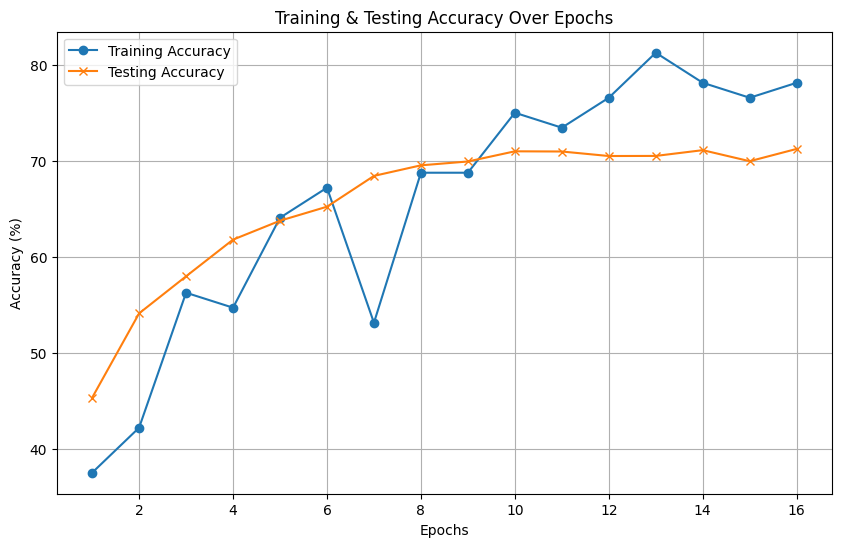

In [18]:
import matplotlib.pyplot as plt

# Epochs
epochs = range(1, 17)

# Training and Testing Accuracy
training_accuracy = [37.5, 42.19, 56.25, 54.69, 64.06, 67.19, 53.12, 68.75, 68.75, 75.00, 73.44, 76.56, 81.25, 78.12, 76.56, 78.12]
testing_accuracy = [45.31, 54.10, 57.96, 61.78, 63.75, 65.21, 68.42, 69.52, 69.92, 70.98, 70.96, 70.49, 70.50, 71.10, 69.95, 71.23]

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, testing_accuracy, 'x-', label='Testing Accuracy')
plt.title('Training & Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
